# EXAMPLE 2 : Simulation of TWINS/LAD observations

In [1]:
#------ EXAMPLE SIMULATION TWINS SATELLITE OBSERVATIONS ------------------------
import exospy.exospy as ep
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import h5py

In [2]:
#------ Reading Pre-processed TWINS data ---
data      = h5py.File('TWINS_DATA.mat','r')
tw_data   = data.get('TWINS_DATA')
tw_data   = np.array(tw_data)
tw_data   = np.transpose(tw_data)


In [3]:
r_pos = tw_data[6000:6200,1:4]/6371
r_los = tw_data[6000:6200,4:7]

In [4]:
# Estimate Intensity 
irradiance  = 0.03 # <<<< FROM LISIRD COMPOSITE LY-ALPHA 
IntensityV  = ep.generateIntensityOpticallyThin(irradiance, r_los,r_pos,'Z15MIN',dl = 0.1,maxRAD = 8, minRAD = 3)

Processing...:   3%|▋                      | 6/200 [00:00<00:03, 57.66it/s]

g factor used in this analysis =  0.01172378191418021


Processing...: 100%|█████████████████████| 200/200 [00:03<00:00, 62.98it/s]


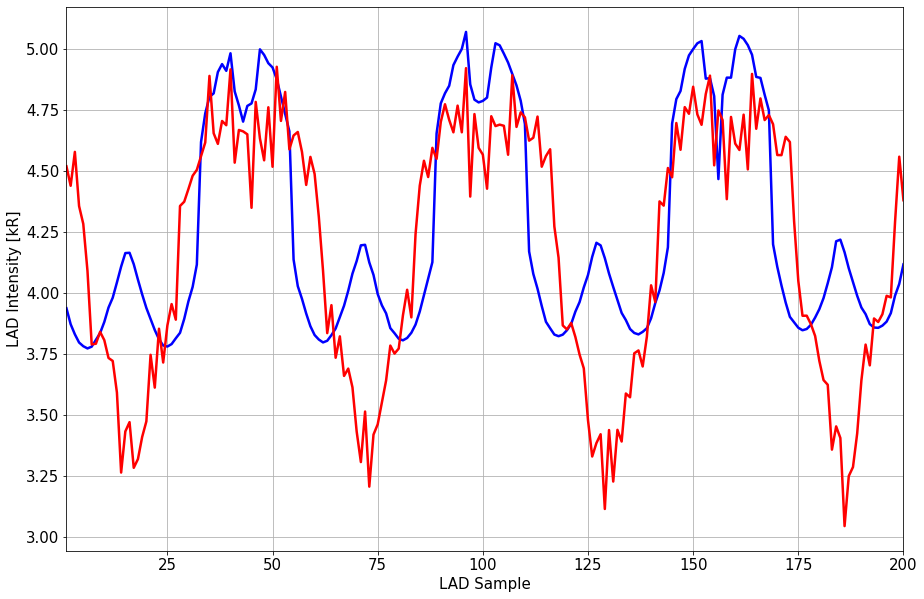

In [5]:
# Plotting Intensity
fig = plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)
ax.plot(np.arange(1,len(IntensityV)+1,1),IntensityV/1000,color='b',linewidth = 2.5)
ax.plot(np.arange(1,len(IntensityV)+1,1),tw_data[6000:6200,0]/1000,color='r',linewidth = 2.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid('on')
ax.set_xlabel('LAD Sample', fontsize=15)
ax.set_ylabel('LAD Intensity [kR]',fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

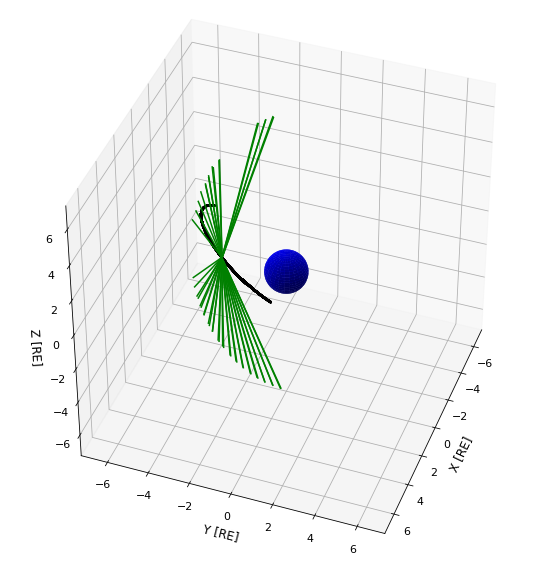

In [6]:
# Plotting TWINS orbit
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection='3d')
## Plotting Earth at center
u   = np.linspace(0,2*np.pi,100)
v   = np.linspace(0,np.pi,100)
x = 1*np.outer(np.cos(u),np.sin(v))
y = 1*np.outer(np.sin(u),np.sin(v))
z = 1*np.outer(np.ones(np.size(u)),np.cos(v))
ax.plot_surface(x,y,z, rstride = 4, cstride = 4, color='b',zorder=-1)

## Plotting Orbit
ax.scatter3D(tw_data[1:8000,1]/6371,tw_data[1:8000,2]/6371,tw_data[1:8000,3]/6371,s=2,c='k')

## Labeling figure
ax.set_xlabel('X [RE]',fontsize=12)
ax.set_ylabel('Y [RE]',fontsize=12)
ax.set_zlabel('Z [RE]',fontsize=12)
ax.view_init(40, 20)
ax.set_box_aspect([1,1,1])

## Setting limits in figure
ax.axes.set_xlim3d(left=-7, right=7) 
ax.axes.set_ylim3d(bottom=-7, top=7) 
ax.axes.set_zlim3d(bottom=-7, top=7) 

## Setting label size for ticks
ax.tick_params(axis='both', which='major', labelsize=11)
## Plotting TWINS-LOS
for i in range(50):
    new_point = r_pos[i,:]+10*r_los[i,:]
    ax.plot3D([r_pos[i,0],new_point[0]],[r_pos[i,1],new_point[1]],[r_pos[i,2],new_point[2]],color= 'g',zorder = 10)

plt.show()

